# Hello, Pinecone!

## Prerequisites

Install dependencies.

In [1]:
!pip install -qU pip pinecone-client pandas

Set up Pinecone.

In [2]:
import pinecone
import os

api_key = os.getenv("PINECONE_API_KEY") or "USE_YOUR_API_KEY"
pinecone.init(api_key=api_key)

Check Pinecone version compatibility.

In [3]:
import pinecone.info

version_info = pinecone.info.version()
server_version = ".".join(version_info.server.split(".")[:2])
client_version = ".".join(version_info.client.split(".")[:2])
notebook_version = "0.8"

assert (
    notebook_version == server_version
), "This notebook is outdated. Consider using the latest version of the notebook."
assert client_version == server_version, "Please upgrade pinecone-client."

## Pinecone quickstart

In [4]:
import pinecone.graph
import pinecone.service
import pinecone.connector
import pandas as pd

In [5]:
service_name = "hello-pinecone"

In [6]:
graph = pinecone.graph.IndexGraph()  # Create a Pinecone graph

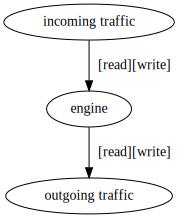

In [7]:
graph.view()  # view the graph

In [8]:
pinecone.service.deploy(service_name, graph)  # deploy the graph as a service

{'msg': '', 'success': True}

In [9]:
conn = pinecone.connector.connect(service_name)  # connect to the service

In [10]:
df = pd.DataFrame(data={"id": ["A", "B"], "vector": [[1, 1, 1], [1, 2, 3]]})
df

,id,vector
0,A,"[1, 1, 1]"
1,B,"[1, 2, 3]"


In [11]:
conn.upsert(items=zip(df.id, df.vector)).collect()  # insert vectors

[IndexResult(id='A'), IndexResult(id='B')]

In [12]:
conn.info()  # index info

InfoResult(index_size=2)

In [13]:
conn.query(queries=[[2, 2, 2], [2, 4, 6]]).collect()

[QueryResult(ids=['A', 'B'], scores=[0.9999999403953552, 0.925819993019104], data=None),
 QueryResult(ids=['B', 'A'], scores=[0.9999998807907104, 0.925819993019104], data=None)]

In [14]:
pinecone.service.stop(service_name=service_name)  # stop the service

{'success': True}